<a href="https://colab.research.google.com/github/yohanesnuwara/66DaysOfData/blob/main/D04_heteroskedasticity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heteroskedasticity

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
from statsmodels.compat import lzip
from patsy import dmatrices

In [ ]:
path = 'https://raw.githubusercontent.com/yohanesnuwara/datasets/master/monthly_gold_price_index_fred.csv'

df = pd.read_csv(path)
df['Time_Period'] = np.arange(len(df))+1
df.head()

,DATE,Export_Price_Index_of_Gold,Time_Period
0,2001-01-01,97.0,1
1,2001-02-01,94.8,2
2,2001-03-01,93.7,3
3,2001-04-01,93.9,4
4,2001-05-01,93.1,5


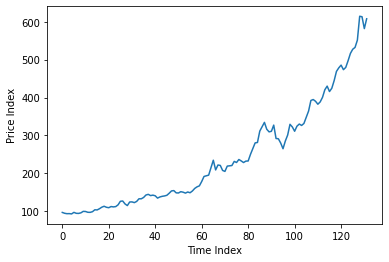

In [ ]:
# Plot timeseries
df['Export_Price_Index_of_Gold'].plot()
plt.xlabel('Time Index')
plt.ylabel('Price Index')
plt.show()

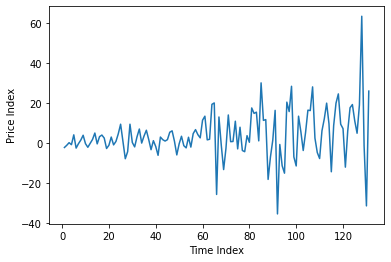

In [ ]:
# Plot timeseries difference
df['Export_Price_Index_of_Gold'].diff().plot()
plt.xlabel('Time Index')
plt.ylabel('Price Index')
plt.show()

## Removing heteroskedasticity

Use log transform.

In [ ]:
# Take log
df['LOG_Export_Price_Index_of_Gold'] = np.log(df['Export_Price_Index_of_Gold'])

df.head()

,DATE,Export_Price_Index_of_Gold,Time_Period,LOG_Export_Price_Index_of_Gold
0,2001-01-01,97.0,1,4.574711
1,2001-02-01,94.8,2,4.551769
2,2001-03-01,93.7,3,4.540098
3,2001-04-01,93.9,4,4.542230
4,2001-05-01,93.1,5,4.533674


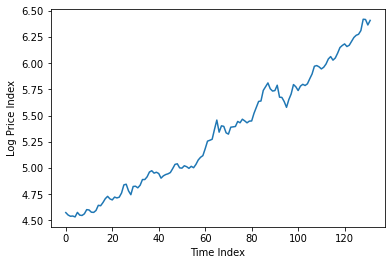

In [ ]:
# Plot timeseries
df.iloc[:,-1].plot()
plt.xlabel('Time Index')
plt.ylabel('Log Price Index')
plt.show()

## Ordinary Least Square Regression (OLSR)

Apply ordinary least-square regression to the log transformed feature.

In [ ]:
expr = 'LOG_Export_Price_Index_of_Gold ~ Time_Period'
olsr_results = smf.ols(expr, df).fit()

# Print residual
print(olsr_results.resid)

0      0.174255
1      0.137017
2      0.111049
3      0.098885
4      0.076032
         ...   
127    0.095990
128    0.190242
129    0.173828
130    0.107130
131    0.136388
Length: 132, dtype: float64


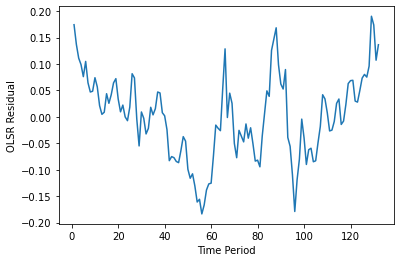

In [ ]:
x = df['Time_Period'].values
y = olsr_results.resid
plt.plot(x, y)
plt.xlabel('Time Period')
plt.ylabel('OLSR Residual')
plt.show()

## White test for heteroskedasticity

Null hypothesis ($H_0$): Data is homoskedastic

If P<0.5, reject null hypothesis, that means data is heteroskedastic.

In [ ]:
# Test heteroskedasticity on residual
y, X = dmatrices(expr, df, return_type='dataframe')

keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 
        'F-statistic:', 'F-test\'s p-value:']
results = het_white(olsr_results.resid, X)
lzip(keys, results)

[('Lagrange Multiplier statistic:', 1.0637754647234723),
 ("LM test's p-value:", 0.5874948891259568),
 ('F-statistic:', 0.524022421741496),
 ("F-test's p-value:", 0.5933889438781197)]

Both p-value for Lagrange Multiplier (LM) and F-test are >0.05 (significance level), so accept null hypothesis. The conclusion is, data in column 'LOG_' is homoskedastic.

## Breusch-Pagan test for heteroskedasticity

In [ ]:
keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 
        'F-statistic:', 'F-test\'s p-value:']
results = het_breuschpagan(olsr_results.resid, X)
lzip(keys, results)

[('Lagrange Multiplier statistic:', 0.8320049475891813),
 ("LM test's p-value:", 0.36169341751904016),
 ('F-statistic:', 0.8245962983834275),
 ("F-test's p-value:", 0.3655200272928172)]

Again, because p-values >0.05, accept null hypothesis, and the 'LOG_' is homoskedastic.

References:

* https://towardsdatascience.com/heteroscedasticity-is-nothing-to-be-afraid-of-730dd3f7ca1f
* Other resources:
  * This thread is interesting, it states that heteroskedasticity in data can cause biased model and choosing which metric to use: https://stats.stackexchange.com/questions/300281/why-does-skew-and-heteroscedasticity-lead-to-bias 